In [58]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Dataset

In [59]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
x1 = x[:, 0]
x2 = x[:, 1]

In [60]:
import plotly.express as px
fig = px.scatter_3d(x=x1, y=x2, z=y, labels={"x": "X1", "y": "X2", "z": "Y"})
fig.show()

In [61]:
print(x.shape)
x1 = x1.reshape((x.shape[0], 1))
x2 = x2.reshape((x.shape[0], 1))
y = y.reshape((x.shape[0], 1))
print(y.shape)

(100, 2)
(100, 1)


In [62]:
class LinearRegression:
    def __init__(self, x_):
        """
        Initialisation du poids θ
        :param x_: Matrice des variables
        """
        _, n = x_.shape
        self.theta_ = np.random.randn(n+1, 1)

    def predict(self, x_):
        """
        Calcul du Modèle linéaire f(X) = X.θ
        :param x_: Matrice des variables
        """
        m, _ = x_.shape
        X_ = np.hstack(( x_, np.ones((m, 1)) ))
        return X_ @ self.theta_

    @staticmethod
    def cost_function(fx_, y_):
        """
        Fonction de coût J(θ) = 1/2m * ∑(X.θ - Y)²
        :param fx_: Matrice des valeurs prédites par le modèle
        :param y_: Matrice de la Target
        """
        m, _ = y_.shape
        return 1/(2*m) * np.sum( (fx_ - y_)**2 )

    def fit(self, x_, y_, learning_rate:float=0.01, n_iterations:int=1000):
        """
        Ajustement du modèle avec la méthode de la descente de gradient
        :param x_: Matrice des variables
        :param y_: Matrice de la Target
        :param learning_rate: Taux d'apprentissage
        :param n_iterations: Nombre d'itérations du gradient descent
        :return: Poids θ final
        """
        m, n = x_.shape
        X_ = np.hstack( (x_, np.ones((m, 1))) )
        cost_history = np.zeros(n_iterations)

        for i in range(0, n_iterations):
            self.theta_ = self.theta_ - learning_rate * (1/m * (X_.transpose().dot(self.predict(x_) - y_)))
            cost_history[i] = self.cost_function(self.predict(x_), y_)

        return cost_history

    @staticmethod
    def r_sqrt_performance(fx_, y_):
        """
        Coéfficient de Détermination R² = 1 - (∑(Y — f(x))² / ∑(Y - Ȳ)²)
        :param fx_: Matrice des valeurs prédites par le modèle
        :param y_: Matrice de la Target
        :return: R²
        """
        u = np.sum((y_ - fx_)**2)
        v = np.sum((y_ - y_.mean())**2)
        return 1 - u/v


In [63]:
multiple_linear_reg = LinearRegression(x)
J_history = multiple_linear_reg.fit(x, y)

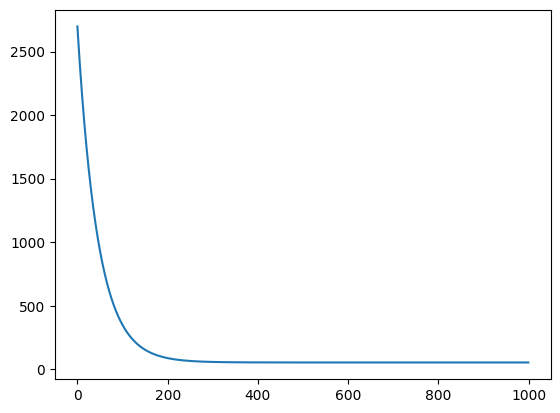

In [64]:
plt.plot(J_history)
plt.show()

In [65]:
y_pred = multiple_linear_reg.predict(x)

In [66]:
print(multiple_linear_reg.r_sqrt_performance(y_pred, y))

0.9803327476304342


In [67]:
a, b, c = multiple_linear_reg.theta_

In [74]:
import plotly.graph_objects as go

x1_line = np.linspace(x1.min(), x1.max(), 20)
x2_line = np.linspace(x2.min(), x2.max(), 20)
x1_line, x2_line = np.meshgrid(x1_line, x2_line)

y_pred_line = a * x1_line + b * x2_line + c

# Data Viz
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=x1.ravel(),
    y=x2.ravel(),
    z=y.ravel(),
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.9, showscale=False),
    name="Données"
))

fig.add_trace(
    go.Surface(
        x=x1_line, y=x2_line, z=y_pred_line,
        colorscale="Reds", opacity=0.5,
        name="Plan de régression"
    )
)

fig.update_layout(
    scene=dict(
        xaxis_title="X1",
        yaxis_title="X2",
        zaxis_title="Y"
    ),
    title="Régression linéaire multiple en 3D"
)

fig.show()
